# Example Notebook #2 - Factor Portfolio
In this notebook, we take a look at the problem of portfolio allocation from a dynamic standpoint of asset selection. In this case we assume that we have a risk model in the general form $
x_{i, t, k}=\alpha_{i, k}+\beta_{1, i, k} f_{1, t, k}+\beta_{2, i, k} f_{2, t, k}+\cdots+\beta_{m, i, k} f_{m, t, k}+\epsilon_{i, t, k}
$ for asset $k$. We would like to construct a single-factor portfolio that given a set of parameter estimates $\boldsymbol{\beta}_t$ constructs a single factor portfolio by taking a long position or long-short position by constructing a quantile: $
Q_{\beta_t}(p):=\inf \{\beta_t \in \mathbb{R}: p \leq F(x)\}
$. Then for example a long-short portfolio can be constructed by mapping a set of investor defined weights $\boldsymbol{w} \to Q_{\beta^{value}_t}(0.9), Q_{\beta^{value}_t}(0.1)$ constructing a single-factor long-short portfolio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

In [2]:
#dev on the fly
os.chdir('C:\\Users\matus\pysource\portfolio_swissknife')

In [3]:
# !pip install .

In [4]:
from portfolio_swissknife import portfolio as ps
from portfolio_swissknife import risk_model as rm

## 1. Loading Data and Setup
First we load our universe -- in this case some custom data that is stored locally. We process the data and create a `Portfolio` object that serves as a corpus for our universe.

In [5]:
#loading ext. data -- close prices of SPX
universe = pd.read_csv('ext_data/00_db_SPX__PX_LAST.csv', index_col = 0, parse_dates = True)
universe = universe[::-1].loc[:,universe.notna().all(axis=0)]
securities = [universe.columns[i].split(' ')[0] for i, _ in enumerate(universe.columns)]
universe = universe.loc['2014':]

In [6]:
port_universe = ps.Portfolio(securities)
port_universe.set_custom_prices(universe, 'daily')

Then a risk model is specified and created using the familiar `RiskModel` object and prices are loaded. To construct a portfolio using a nonparametric sort we call the method `.rolling_factor_selection` that conducts and out-of-sample rolling estimation of all of the betas in our prespecified risk model. 


In [7]:
factors = ['SPY', 'VLUE', 'SIZE', 'QUAL', 'MTUM', 'USMV']
rm_universe = rm.RiskModel(port_universe, factors)
rm_universe.get_prices('daily')

[*********************100%***********************]  6 of 6 completed


In [8]:
rm_universe.rolling_factor_selection(percentile = 10, method = 'linear',
                                     estimation_period = int(2*252), window = 22)

To simulate the strategy historically, we create the `FactorPotfolio` class inputting the universe `Portfolio` and `RiskModel` objects. We select the risk factor we would like to sort on, load our benchmark and discount rates and we are ready to backtest in the same way as we would backtest a portfolio with static assets.

## Long Only Top Decile Value Factor Portfolio

In [9]:
factor_pf_vlue = ps.FactorPortfolio(port_universe, rm_universe, 'VLUE')
factor_pf_vlue.set_constraints(default = True)
factor_pf_vlue.set_benchmark('SPY')
factor_pf_vlue.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
factor_pf_vlue.historical_backtest(models=['EW','GMV','RP','MDD'],frequency=22, estimation_period=int(2*252))

C:\Users\matus\anaconda3\envs\dev01\lib\site-packages\portfolio_swissknife\metrics.py:193: RuntimeWarning: invalid value encountered in sqrt
  var = np.sqrt((nu_fit - 2) / nu_fit) * t.ppf(1 - alpha, nu_fit) * sig_fit_norm - mu_fit_norm


,EW,GMV,RP,MDD
Average Returns,19.52%,14.49%,15.86%,11.38%
CAGR,16.42%,13.09%,14.08%,6.67%
Volatility,44.18%,38.08%,39.83%,33.74%
CEQ,-2.57149,-4.54353,-4.05395,-106.147
Max DD,49.02%,37.62%,39.92%,68.88%
Skewness,0.09,-0.37,0.02,-1.63
Kurtosis,-2.99,-2.99,-2.99,-2.98
Sharpe Ratio,0.40,0.33,0.35,0.28
Sortino Ratio,0.72,0.67,0.72,0.33
Calmar Ratio,-0.40,-0.39,-0.40,-0.17


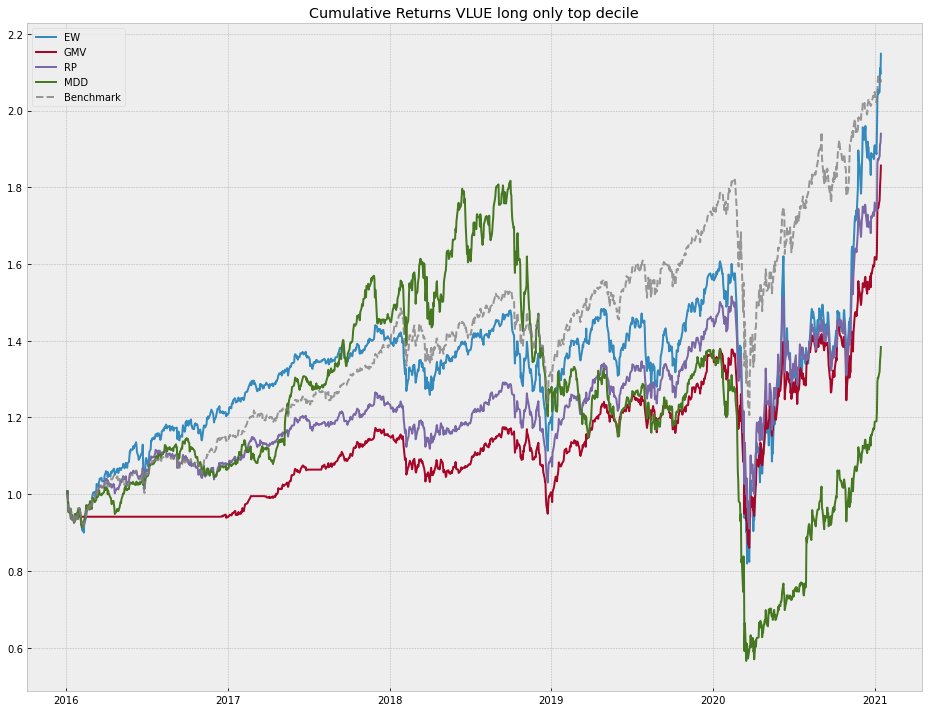

In [14]:
factor_pf_vlue.get_backtest_report(display_weights = False, title = 'VLUE long only top decile')

## Long Only Top Decile Value Factor Portfolio

In [15]:
factor_pf_mtum = ps.FactorPortfolio(port_universe, rm_universe, 'MTUM')
factor_pf_mtum.set_constraints(default = True)
factor_pf_mtum.set_benchmark('SPY')
factor_pf_mtum.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
factor_pf_mtum.historical_backtest(models=['EW','GMV','RP','MDD'],frequency=22, estimation_period=int(2*252))

In [17]:
factor_pf_mtum.backtest['EW']['returns'].shape

(1267,)

,EW,GMV,RP,MDD
Average Returns,11.94%,9.74%,10.15%,10.33%
CAGR,10.00%,8.23%,8.62%,6.04%
Volatility,34.56%,31.21%,31.86%,32.15%
CEQ,-5.33907,-5.86846,-5.78357,-124.235
Max DD,37.12%,35.41%,34.63%,62.24%
Skewness,-0.51,-0.79,-0.70,-2.29
Kurtosis,-2.99,-2.99,-2.99,-2.97
Sharpe Ratio,0.29,0.25,0.26,0.26
Sortino Ratio,0.53,0.47,0.49,0.30
Calmar Ratio,-0.32,-0.27,-0.29,-0.17


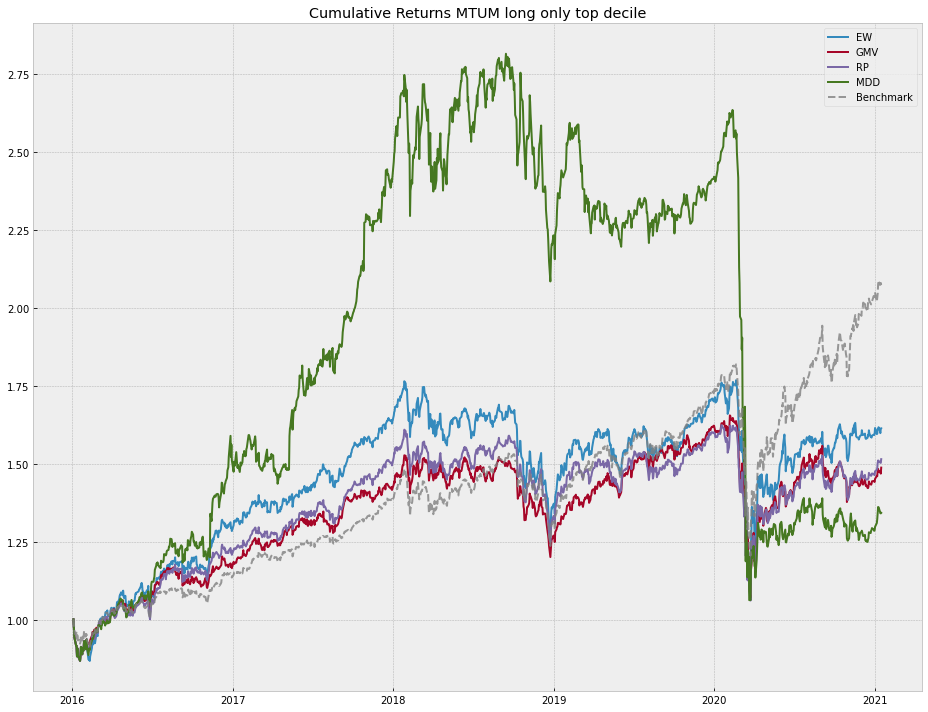

In [18]:
factor_pf_mtum.get_backtest_report(display_weights = False, title = 'MTUM long only top decile')

## 130 - 30 Long Short Momentum Factor Portfolio

In [41]:
factor_pf_mtum = ps.FactorPortfolio(port_universe, rm_universe, 'MTUM')
factor_pf_mtum.set_constraints(default = True)
factor_pf_mtum.set_benchmark('SPY')
factor_pf_mtum.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [42]:
factor_pf_mtum.historical_backtest(models=['EW','GMV','RP','MDD'],frequency=22,
                                   long_only = False, long_exposure = 1.3, short_exposure = 0.3,
                                   estimation_period=int(2*252))

,EW,GMV,RP,MDD
Average Returns,10.06%,7.19%,7.73%,7.97%
CAGR,7.56%,5.09%,5.70%,1.61%
Volatility,31.73%,26.83%,27.80%,28.24%
CEQ,-5.80105,-6.22016,-6.17508,-6.14904
Max DD,36.71%,32.90%,32.54%,70.18%
Skewness,-0.39,-0.56,-0.53,-2.11
Kurtosis,-2.99,-2.99,-2.99,-2.98
Sharpe Ratio,0.25,0.19,0.21,0.21
Sortino Ratio,0.41,0.29,0.33,0.18
Calmar Ratio,-0.27,-0.22,-0.24,-0.11


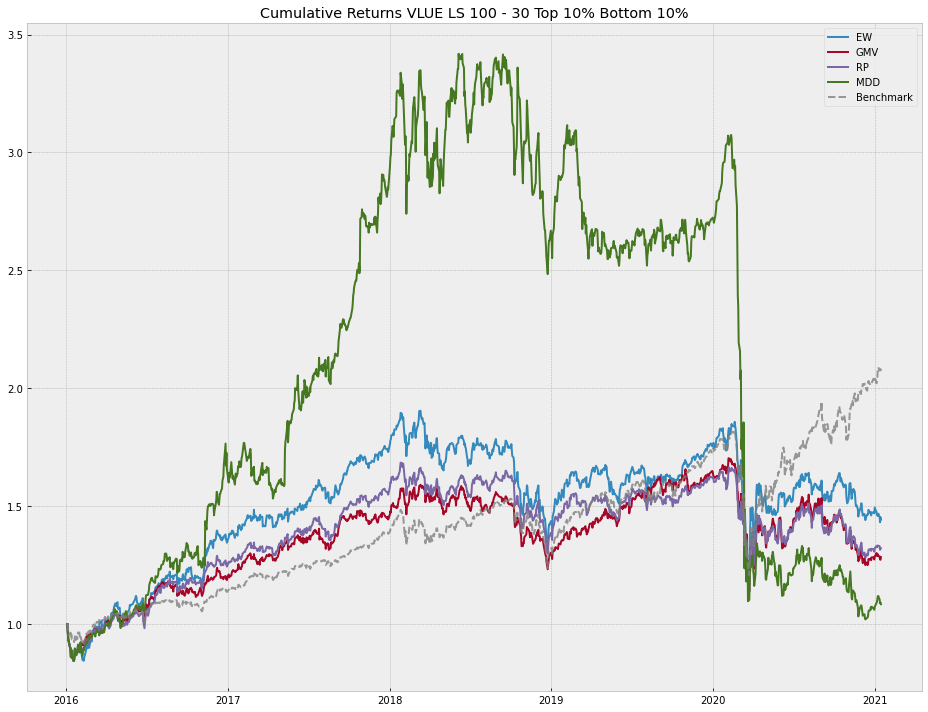

In [45]:
factor_pf_mtum.get_backtest_report(display_weights = False, title = 'VLUE LS 100 - 30 Top 10% Bottom 10%')